<a href="https://colab.research.google.com/github/marcosvnespolo/Previsao_Inadimplencia/blob/main/Previs%C3%A3o_Inadimpl%C3%AAncia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sobre o Projeto

Uma empresa de cartão de crédito forneceu um dataset que inclui dados financeiros e demográficos de uma amostra de 30.000 titulares de contas. Os dados estão apresentados em nível conta de crédio, ou seja, cada linha do dataset representa uma conta de um cliente distinto.
O objetivo do projeto é desenvolver um modelo que preveja se uma conta ficará inadimplente no próximo mês, de acordo com dados demográficos e históricos.

Os dados já foram preparados e estão disponíveis na pasta do projeto.

In [1]:
import pandas as pd
df = pd.read_excel('/content/drive/MyDrive/Projetos Portfólio/Projetos DS com Python/Projeto 1/default_of_credit_card_clients__courseware_version_1_21_19.xls')

# 1. Inspecionando os Dados

In [2]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [3]:
df.shape

(30000, 25)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          30000 non-null  object
 1   LIMIT_BAL                   30000 non-null  int64 
 2   SEX                         30000 non-null  int64 
 3   EDUCATION                   30000 non-null  int64 
 4   MARRIAGE                    30000 non-null  int64 
 5   AGE                         30000 non-null  int64 
 6   PAY_1                       30000 non-null  object
 7   PAY_2                       30000 non-null  int64 
 8   PAY_3                       30000 non-null  int64 
 9   PAY_4                       30000 non-null  int64 
 10  PAY_5                       30000 non-null  int64 
 11  PAY_6                       30000 non-null  int64 
 12  BILL_AMT1                   30000 non-null  int64 
 13  BILL_AMT2                   30000 non-null  in

In [5]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

Aparentemente a coluna ID apresenta o nome de cada cliente na base de dados, porém, podemos confirmar esta informação através do método .nunique()

In [6]:
df['ID'].nunique()


29687

O número de ID's únicos é inferior ao número de linhas, desta forma, o ID não é um identificador único, como sugerido anteriormente, sabemos então que há alguma duplicação de ID's.

Porém, quantos ID's estão duplicados? É possível começar a responder essa pergunta através do método .value_counts().

In [7]:
contagem_id = df['ID'].value_counts()

In [8]:
contagem_id.head(10)

ad23fe5c-7b09    2
1fb3e3e6-a68d    2
89f8f447-fca8    2
7c9b7473-cc2f    2
90330d02-82d9    2
2a793ecf-05c6    2
75938fec-e5ec    2
7be61027-a493    2
a3a5c0fc-fdd6    2
b44b81b2-7789    2
Name: ID, dtype: int64

Podemos utilizar novamente o método .value_counts() para identificar quantos valores são únicos ou duplicados.

In [9]:
contagem_id.value_counts()

1    29374
2      313
Name: ID, dtype: int64

# 2. Examinando ID's duplicados

No passo anterior, foi observado que os ID's duplicados não aparecem mais do que duas vezes, utilizarei esta informação para encontrar e avaliá-los

In [10]:
# Visualizando os 15 primeiros ID's duplicados
id_duplicados = contagem_id == 2
id_duplicados[0:15]

ad23fe5c-7b09    True
1fb3e3e6-a68d    True
89f8f447-fca8    True
7c9b7473-cc2f    True
90330d02-82d9    True
2a793ecf-05c6    True
75938fec-e5ec    True
7be61027-a493    True
a3a5c0fc-fdd6    True
b44b81b2-7789    True
998fa9b2-b341    True
69566a6b-6156    True
4e2380e6-a8cf    True
b87bf8f3-d704    True
4f95b36b-ab10    True
Name: ID, dtype: bool

In [11]:
in_dupl_index = contagem_id.index[id_duplicados]
in_dupl_index

Index(['ad23fe5c-7b09', '1fb3e3e6-a68d', '89f8f447-fca8', '7c9b7473-cc2f',
       '90330d02-82d9', '2a793ecf-05c6', '75938fec-e5ec', '7be61027-a493',
       'a3a5c0fc-fdd6', 'b44b81b2-7789',
       ...
       '4f249cbc-5e9c', '40e75290-0f59', 'fc73f07e-eb96', '2a8ad33f-fa9c',
       'cdae2be5-8ec4', 'c69162db-4864', '73ea498f-44b2', '327d06d5-ce7f',
       'd13465a5-a9e0', '841ae407-dc4c'],
      dtype='object', length=313)

A series possui 313 entradas, exatamente o mesmo número obtido anteriormente.
No próximo passo, converterei a series para a forma de lista, pois este formato será útil em etapas posteriores do projeto.


In [12]:
lista_id_dupl = list(in_dupl_index)
len(lista_id_dupl)

313

In [13]:
# Verificando as primeiras entradas
lista_id_dupl[0:5]

['ad23fe5c-7b09',
 '1fb3e3e6-a68d',
 '89f8f447-fca8',
 '7c9b7473-cc2f',
 '90330d02-82d9']

In [14]:
df.loc[df['ID'].isin(lista_id_dupl[0:3]),:].head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
5033,89f8f447-fca8,320000,2,2,1,32,0,0,0,0,...,169371,172868,150827,8000,8000,5500,6100,6000,5000,0
5133,89f8f447-fca8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16727,1fb3e3e6-a68d,80000,1,2,2,33,2,2,0,0,...,27394,29922,31879,0,2000,2000,3000,2600,0,1
16827,1fb3e3e6-a68d,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29685,ad23fe5c-7b09,50000,1,3,1,32,0,0,0,0,...,12882,8131,3983,3000,2871,1000,163,3983,3771,1
29785,ad23fe5c-7b09,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


O que parece estar acontecendo é que os ID's duplicados possuem uma linha válida, e outra composta apenas por 0, desta forma, nas próximas etapas do projeto, será necessário encontrar uma forma de xcluir estas linhas.

# 3. Lidando com Valores Nulos

In [15]:
df_zero = df == 0

O objetivo, a partir de agora, é criar uma nova série booleana que identifique cada linha em que todos os elementos a partir da segunda coluna (Para não considerarmos a coluna ID) são iguais a zero.

In [16]:
linhas_zero = df_zero.iloc[:,1:].all(axis=1)

In [17]:
sum(linhas_zero)

315

O que o resultado acima nos diz é que 315 linhas tem zeros para cada coluna, exceto a primeira. Como este número é maior que o número de ID's duplicados (313), então podemos excluir estes registros sem maiores problemas.

Isto pode ser feito utilizando o código a seguir:

In [18]:
df_limpo = df.loc[~linhas_zero, :].copy()

O código acima retorna uma cópia dos dados que desejo manter, este é o motivo do uso do operador nógico not "~", pois desejo obter todas as observações que não tem zeros, e ":" foi utilziado para selecionar todas as colunas.

Utilizando o método .shape, verifico que o número de linhas é exatamente igual ao número de Id's únicos.

In [19]:
df_limpo.shape

(29685, 25)

In [20]:
df_limpo['ID'].nunique()

29685

Desta forma, conclui-se que os valores duplicados foram eliminados com sucesso, tendo em vista que o número de linhas de novo DataFram (df_limpo) é igual ao número de ID's únicos.

# 4. Exploração e Limpeza dos Dados

In [21]:
df_limpo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29685 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          29685 non-null  object
 1   LIMIT_BAL                   29685 non-null  int64 
 2   SEX                         29685 non-null  int64 
 3   EDUCATION                   29685 non-null  int64 
 4   MARRIAGE                    29685 non-null  int64 
 5   AGE                         29685 non-null  int64 
 6   PAY_1                       29685 non-null  object
 7   PAY_2                       29685 non-null  int64 
 8   PAY_3                       29685 non-null  int64 
 9   PAY_4                       29685 non-null  int64 
 10  PAY_5                       29685 non-null  int64 
 11  PAY_6                       29685 non-null  int64 
 12  BILL_AMT1                   29685 non-null  int64 
 13  BILL_AMT2                   29685 non-null  in

Avaliando as informações apresentadas, é possível perceber que o dataset possui 25 colunas, 29685 registros não-nulos para cada coluna, e a maioria das colunas apresenta dados do tipo inteiro, com excessão das colunas ID e PAY_1.

Já sabemos que a coluna ID é somposta por strings que apresentas os ID's de contas, mas e quanto a PAY_1? Tudo indica que esta coluna deveria ser composta por inteiros.

In [22]:
df_limpo['PAY_1'].head(10)

0     2
1    -1
2     0
3     0
4    -1
5     0
6     0
7     0
8     0
9    -2
Name: PAY_1, dtype: object

Os dados acima são relacinados so status de pagamento da fatura mensal mais recente. Mais detalhes a respeito desta coluna podem ser encontrados no dicionários de dados presente no seguinte link:https://archive.ics.uci.edu/dataset/350/default+of+credit+card+clients.

De acordo com o dicionário de dados, a lógica para a construção desta escala é a seguinte:

- Pagamento na data correta = -1
- Pagamento com um mês de atraso = 1
- Pagamento com dois mêses de atraso = 2
- Pagamento com três meses de atraso = 3...


E assim por diante.



Sabendo disto, é interessante entender quantos clientes se encontram em cada situação descrita acima

In [23]:
df_limpo['PAY_1'].value_counts()

0                13087
-1                5047
1                 3261
Not available     3021
-2                2476
2                 2378
3                  292
4                   63
5                   23
8                   17
6                   11
7                    9
Name: PAY_1, dtype: int64

O resultado anterior revela a presença de dois valores não documentados no dicionário dae de dados: 0 e -2.

Além disso, é possível observar a presença de uma string chamada "Not available", o porque de uma das colunas ter sido importada como object anteriormente.

Por enquanto, apenas removerei os registros "Not Available" da coluna.

In [24]:
pay_1_dados_validos = df_limpo['PAY_1'] != "Not available"
pay_1_dados_validos[0:10]

0    True
1    True
2    True
3    True
4    True
5    True
6    True
7    True
8    True
9    True
Name: PAY_1, dtype: bool

Desta forma, o total de dados válidos (sem valores ausentes) é dado por:

In [25]:
sum(pay_1_dados_validos)

26664

Desta forma, podemos criar um novo DataFrame, que possua apenas valores válidos.

In [26]:
df_limpo2 = df_limpo.loc[pay_1_dados_validos,:].copy()

In [27]:
df_limpo2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26664 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          26664 non-null  object
 1   LIMIT_BAL                   26664 non-null  int64 
 2   SEX                         26664 non-null  int64 
 3   EDUCATION                   26664 non-null  int64 
 4   MARRIAGE                    26664 non-null  int64 
 5   AGE                         26664 non-null  int64 
 6   PAY_1                       26664 non-null  object
 7   PAY_2                       26664 non-null  int64 
 8   PAY_3                       26664 non-null  int64 
 9   PAY_4                       26664 non-null  int64 
 10  PAY_5                       26664 non-null  int64 
 11  PAY_6                       26664 non-null  int64 
 12  BILL_AMT1                   26664 non-null  int64 
 13  BILL_AMT2                   26664 non-null  in

Desta forma, confirmamos, que após o tratamento realizado, o DataFrame possui a quantidade de linhas esperada.

Agora podemos converter o tipo de dados da coluna PAY_1 de object para int64 através do método .astype.

In [28]:
df_limpo2['PAY_1'] = df_limpo2['PAY_1'].astype(int)

In [29]:
df_limpo2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26664 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          26664 non-null  object
 1   LIMIT_BAL                   26664 non-null  int64 
 2   SEX                         26664 non-null  int64 
 3   EDUCATION                   26664 non-null  int64 
 4   MARRIAGE                    26664 non-null  int64 
 5   AGE                         26664 non-null  int64 
 6   PAY_1                       26664 non-null  int64 
 7   PAY_2                       26664 non-null  int64 
 8   PAY_3                       26664 non-null  int64 
 9   PAY_4                       26664 non-null  int64 
 10  PAY_5                       26664 non-null  int64 
 11  PAY_6                       26664 non-null  int64 
 12  BILL_AMT1                   26664 non-null  int64 
 13  BILL_AMT2                   26664 non-null  in

Aplicando novamente o métido .info, é possível perceber que a conversão foi bem sucedida, sendo que agora a coluna PAY_1 se apresenta como int64!

# 5. Exploração das variáveis

Iniciarei esta etapa do projeto através da avaliação das variáveis de limite de crédito ("LIMIT_BALL") e características etárias ("AGE") de cada cliente.

In [30]:
import matplotlib.pyplot as plt


%matplotlib inline

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 150

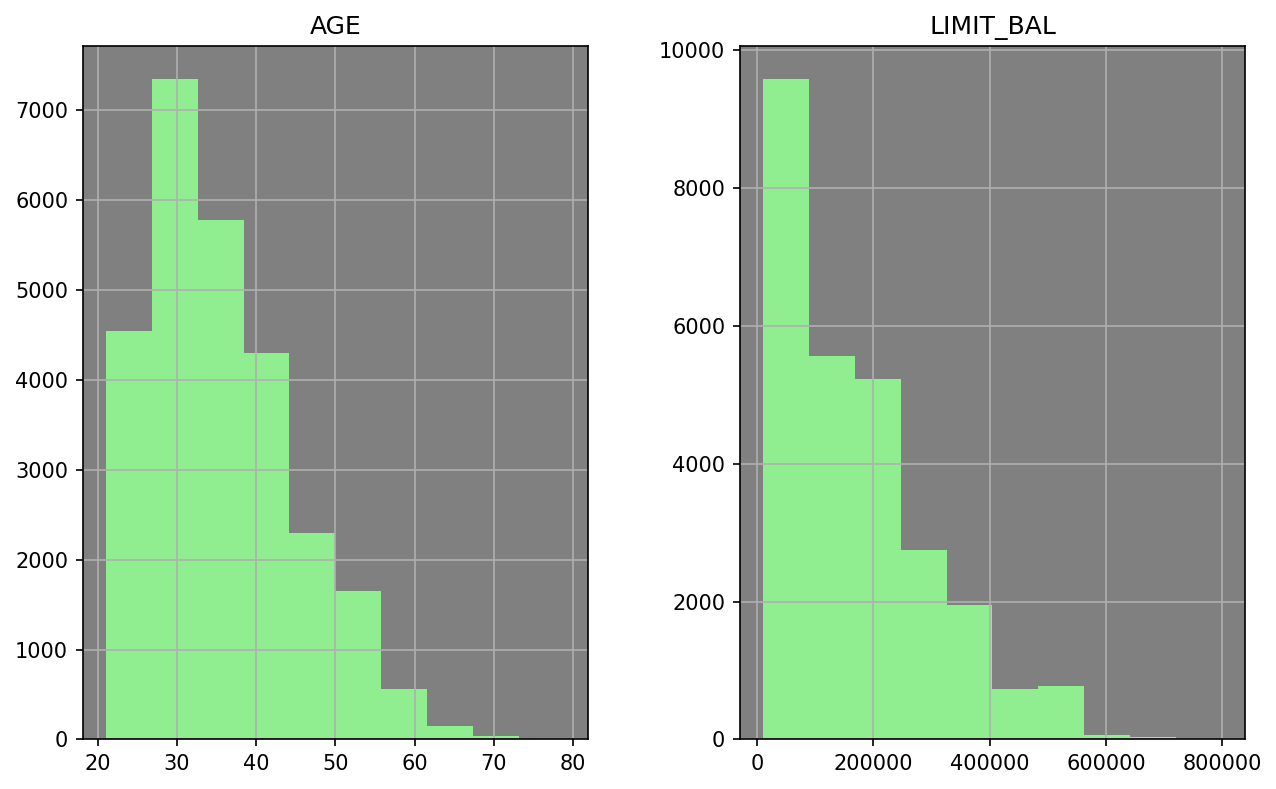

In [31]:
import numpy as np
axes = df_limpo2[['AGE', 'LIMIT_BAL']].hist(figsize=(10, 6), color='lightgreen')
for ax in np.ravel(axes):
    ax.set_facecolor('gray')

Também podemos utilizar a função describe para obter mais informações sobre as duas variáveis.

In [32]:
df_limpo2[['AGE', 'LIMIT_BAL']].describe()

,AGE,LIMIT_BAL
count,26664.000000,26664.000000
mean,35.505213,167919.054905
std,9.227442,129839.453081
min,21.000000,10000.000000
25%,28.000000,50000.000000
50%,34.000000,140000.000000
75%,41.000000,240000.000000
max,79.000000,800000.000000


Algumas considerações a respeito das medidas estatísticas apresentadas:

- A variável AGE parece fazer sentido, com valores entre 21 e 80 anos, o que é factível para uma conta de crédito.
- O mesmo vale para LIMIT_BAL, com limites entre 10.000 e 80.000

Considerando que o dataset considera dados de Taiwan, e a moeda utilizada localmente é o novo dólar taiwanês, quando realizamos a conversão para BRL, obtemos valores de limite entre R$ 1562,00 e R$ 12.500,00, o que são valores dentro do esperado para limite de crédito!!
Fonte: https://www.google.com/search?q=novo+d%C3%B3lar+taiwan%C3%AAs&oq=novos+dolares+ta&aqs=edge.1.69i57j0i22i30.5076j0j1&sourceid=chrome&ie=UTF-8

Podemos também analisar as variáveis categóricas na tentativa de encontrar informações relevantes. Iniciando pelo nível de escoladridade, temos:

In [33]:
df_limpo2['EDUCATION'].value_counts()

2    12458
1     9412
3     4380
5      245
4      115
6       43
0       11
Name: EDUCATION, dtype: int64

Aqui temos um pequeno problema, tendo em vista que os graus de instrução 0, 5, 6 não constam nas informações sobre o dataset.

No dicionário de dados, são fornecidas as seguintes informações sobre grau de escolaridade:

1: pós graduação
2: Universidade
3: Ensino Médio
4: Outros

Como os níveis 0, 5 e 6 não estão bem discriminados, e possuem participação pouco relevante nos dados, os agruparei na classe 4.

In [34]:
df_limpo2['EDUCATION'].replace(to_replace=[0, 5, 6], value=4, inplace=True)


Podemos validar o procedimento acima, aplicando novamente a função .value_counts!

In [35]:
df_limpo2['EDUCATION'].value_counts()

2    12458
1     9412
3     4380
4      414
Name: EDUCATION, dtype: int64

Podemos também avaliar a variável de estado civil, e tentar tirar algumas conclusões.

In [36]:
df_limpo2['MARRIAGE'].value_counts()

2    14158
1    12172
3      286
0       48
Name: MARRIAGE, dtype: int64

Com relação ao estado civil, encontramos um problema bastante semelhante ao nível de escolaridade, pois não possuímos informações a respeito do estado civil "0"

In [37]:
df_limpo2['MARRIAGE'].replace(to_replace=0, value=3, inplace=True)

In [38]:
df_limpo2['MARRIAGE'].value_counts()

2    14158
1    12172
3      334
Name: MARRIAGE, dtype: int64

Somando 48 observações da categoria 0 com 286 obsservações da categoria 3 vistas inicialmente, chegamos exatamente ao número 334.

# 6. Realizando a codificação de variáveis categóricas

In [39]:
df_limpo2['EDUCATION_CAT'] = 'NONE'

In [42]:
df_limpo2[['EDUCATION', 'EDUCATION_CAT']].head()

,EDUCATION,EDUCATION_CAT
0,2,NONE
1,2,NONE
2,2,NONE
3,2,NONE
4,2,NONE


O objetivo é adicionar a string correspondente a cada número, de acordo com o dicionário de dados. Para tal, podemos utilizar a função .map() do python, que utiliza um dicionário para estabelecer uma correspondência entre cada número e sua string.

In [43]:
map = {1: 'Pós Graduação',
       2: 'Graduação',
       3: 'Ensino Médio',
       4: 'Outros'}

In [44]:
df_limpo2['EDUCATION_CAT'] = df_limpo2['EDUCATION'].map(map)

In [46]:
df_limpo2[['EDUCATION', 'EDUCATION_CAT']].head(15)

,EDUCATION,EDUCATION_CAT
0,2,Graduação
1,2,Graduação
2,2,Graduação
3,2,Graduação
4,2,Graduação
5,1,Pós Graduação
6,1,Pós Graduação
7,2,Graduação
8,3,Ensino Médio
9,3,Ensino Médio


A variável "education" em meu conjunto de dados, que categoriza o nível de educação em Pós-graduação, Graduação, Ensino Médio e Outros, originalmente estava codificada como 1, 2, 3 e 4, respectivamente. Entretanto, essa codificação numérica pode ser mal interpretada por modelos de machine learning, que poderiam erroneamente presumir uma ordem ou hierarquia nessas categorias. Para resolver essa questão, recorri ao método conhecido como one-hot encoding.

Com o one-hot encoding, cada categoria é transformada em uma característica binária independente. Por exemplo, a "Pós-graduação" passa a ser representada como [1, 0, 0, 0] e a "Graduação" como [0, 1, 0, 0], e assim por diante. Isso permite que os algoritmos de machine learning interpretem corretamente essas categorias sem confusões, aumentando a eficácia do modelo na utilização dessas informações para fazer previsões precisas.

In [48]:
education_ohe = pd.get_dummies(df_limpo2['EDUCATION_CAT'])

In [50]:
education_ohe.head(15)

,Ensino Médio,Graduação,Outros,Pós Graduação
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0
5,0,0,0,1
6,0,0,0,1
7,0,1,0,0
8,1,0,0,0
9,1,0,0,0


Podemos verificar se a codificação aplicada deu certo através da função .concat() do pandas, onde podemos analisar lado a lado, a variável antiga e as novas variáveis criadas através do OHE!

In [51]:
df_ohe = pd.concat([df_limpo2, education_ohe], axis=1)

In [54]:
df_ohe[['EDUCATION', 'Pós Graduação','Graduação','Ensino Médio','Outros']]

,EDUCATION,Pós Graduação,Graduação,Ensino Médio,Outros
0,2,0,1,0,0
1,2,0,1,0,0
2,2,0,1,0,0
3,2,0,1,0,0
4,2,0,1,0,0
...,...,...,...,...,...
29995,3,0,0,1,0
29996,3,0,0,1,0
29997,2,0,1,0,0
29998,3,0,0,1,0


Ao que tudo indica, o objetivo esperado foi alcançado com êxito!

Feitas as devidas transformações, podemos exportar os dados par aum arquivo .CSV ou para uma planilha do Excel.


In [64]:
df_ohe.to_csv('Dados_Categorizados.csv', index=False)